In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from bucket import inference_to_buckets

In [3]:
snli_roberta_buckets = inference_to_buckets('modeling/roberta/defeasible/results/snli/snli_human_d-snli-roberta-large.json')

snli_gpt3_buckets = inference_to_buckets('modeling/gpt3/defeasible/results/snli/snli_human_gpt3-text-curie-001_processed.json')

100%|█████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 27729.84it/s]


In [4]:
confidences = [b.original_example_prediction.confidence_in_prediction for b in buckets]
gold_label = [b.original_example_prediction.gold_label for b in buckets]

In [9]:
import numpy as np
e_var_y_x = np.mean([b.bucket_confidence_variance for b in buckets])
var_e_y_x = np.var([b.bucket_confidence_mean for b in buckets])

In [18]:
e_var_y_x, var_e_y_x

(0.047630084115787924, 0.07833103071403641)

In [17]:
confs = []

for b in buckets:
    confs.extend([p.confidence_in_gold_label for p in b.paraphrase_predictions])

np.var(confs)

0.12559595690125164

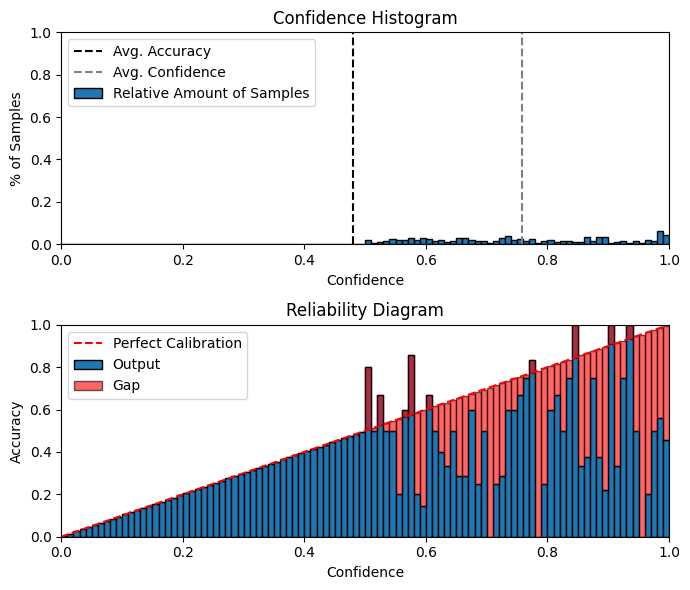

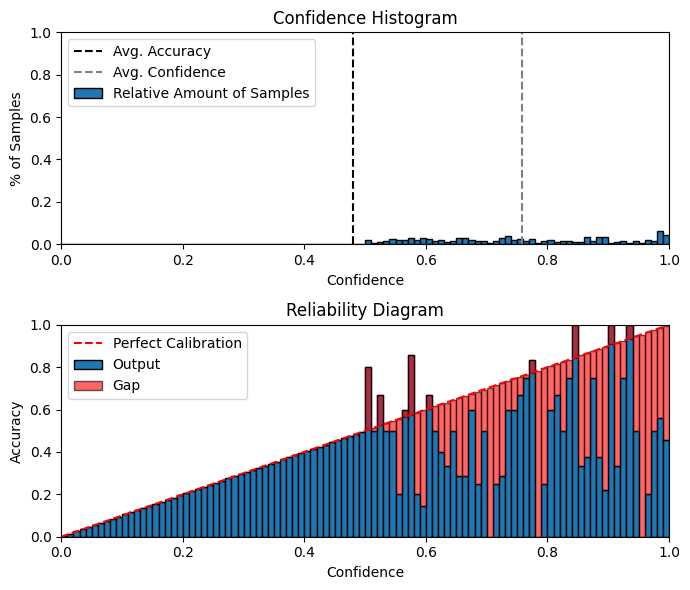

In [6]:
import numpy as np
from netcal.presentation import ReliabilityDiagram

n_bins = 100

diagram = ReliabilityDiagram(n_bins)
diagram.plot(np.array(confidences), np.array(gold_label))  # visualize miscalibration of uncalibrated confidences

In [ ]:
gold_label